# ML Assignment 4 :-
# Q9 : Batch gradient descent and Stochastic gradient descent on wine dataset data.mat
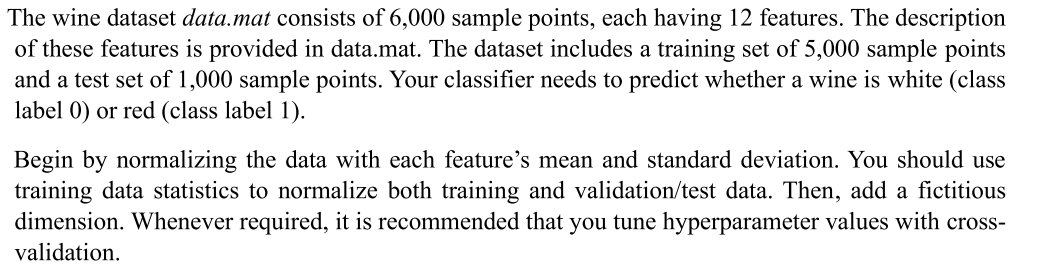
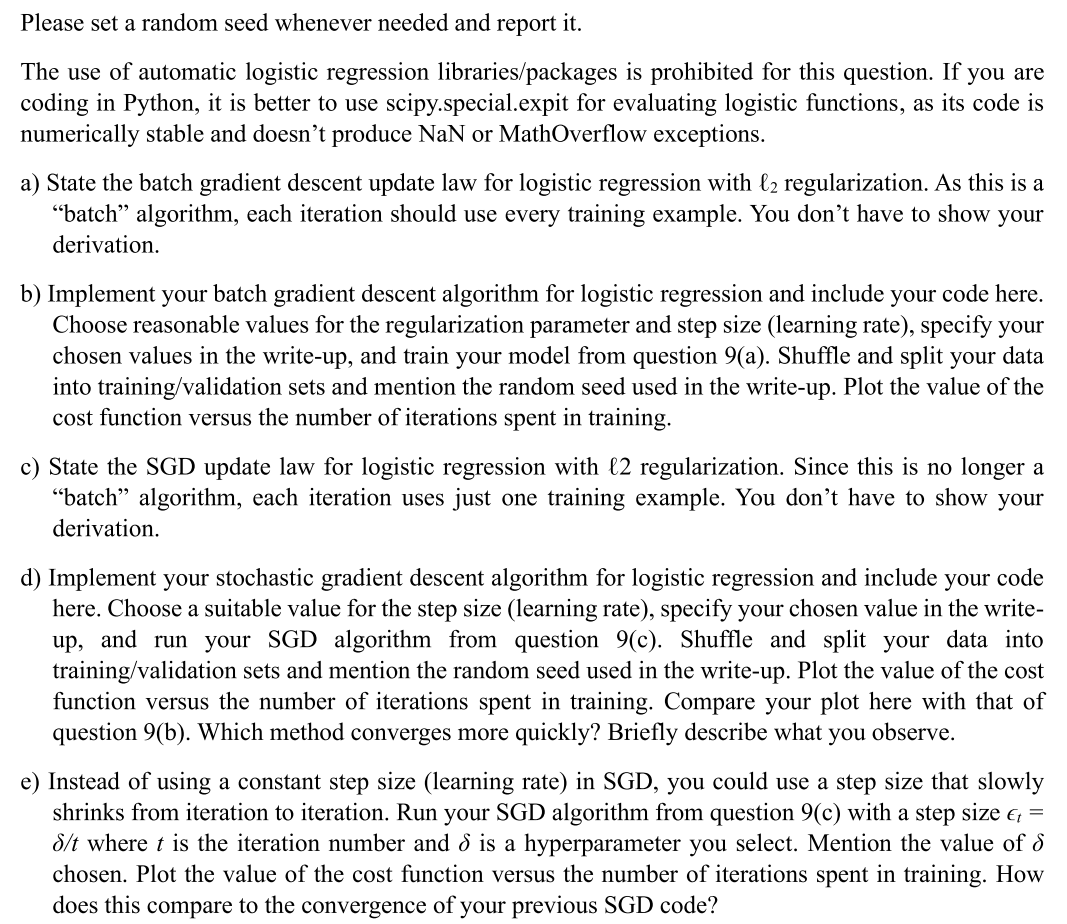
#### Name : Sharanya Dasgupta
#### Roll No. : CS2320

In [5]:
import numpy as np
import scipy.io
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

# Load the data
data = scipy.io.loadmat('data.mat')
X_train = data['X']
y_train = data['y'].ravel()
X_test = data['X_test']

In [6]:
# Normalize the data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Add a fictitious dimension
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

# Cost function
def compute_cost(X, y, w, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(w**2)
    return cost

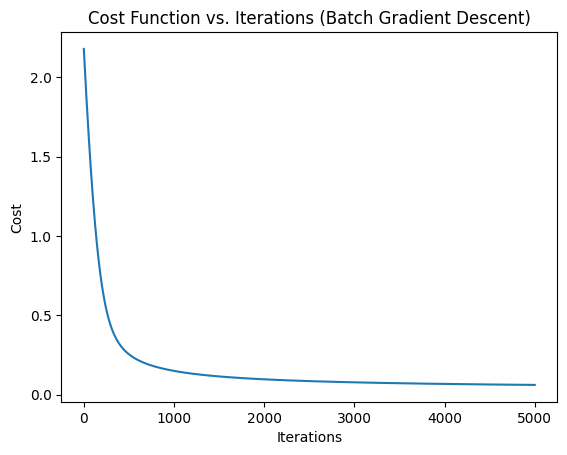

Final weights: [ 0.9797498   1.09446637 -0.32935273 -0.41458686  0.7485073  -0.6092945
 -1.06591191  0.87468956  0.65301912  0.83268198  0.17583611  0.13146862
 -2.32427882]
Final cost: 0.06192424638197431


In [10]:
# Batch Gradient Descent

# Set hyperparameters
learning_rate = 0.01
regularization_param = 0.1
iterations = 5000

# Initialize weights
np.random.seed(42)
w = np.random.randn(X_train.shape[1])

costs = []
for i in range(iterations):
    gradient = (1 / len(y_train)) * np.dot(X_train.T, (sigmoid(np.dot(X_train, w)) - y_train)) + (regularization_param / len(y_train)) * w
    w = w - learning_rate * gradient
    cost = compute_cost(X_train, y_train, w, regularization_param)
    costs.append(cost)

# Plotting the cost function
plt.plot(range(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations (Batch Gradient Descent)')
plt.show()

# Report final weights and cost
print(f'Final weights: {w}')
print(f'Final cost: {costs[-1]}')

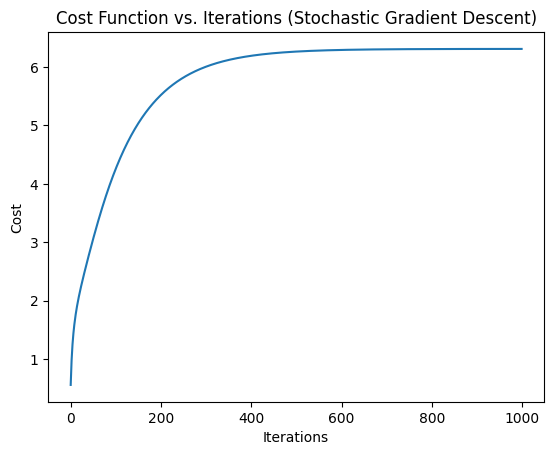


Final weights: [-1.22895373  1.1157561  -0.52499887 -5.17986033  0.65829009  1.09616532
 -2.95898669  7.63590802 -0.96586532  0.16898157  3.28370955  0.34205222
 -3.9216428 ]
Final cost: 6.309623689078696


In [8]:
# Stochastic Gradient Descent

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Initialize weights
np.random.seed(42)
w = np.random.randn(X_train.shape[1])

# Shuffle the data
np.random.seed(42)
shuffled_indices = np.random.permutation(len(y_train))
X_train_shuffled = X_train[shuffled_indices]
y_train_shuffled = y_train[shuffled_indices]

costs = []
for i in range(iterations):
    cost = 0
    for j in range(len(y_train)):
        x_i = X_train_shuffled[j, :].reshape(1, -1)
        y_i = y_train_shuffled[j]
        gradient = np.dot(x_i.T, (sigmoid(np.dot(x_i, w)) - y_i)) + (regularization_param / len(y_train)) * w
        w = w - learning_rate * gradient
        cost += compute_cost(x_i, np.array([y_i]), w, regularization_param)
    costs.append(cost / len(y_train))

# Plotting the cost function
plt.plot(range(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations (Stochastic Gradient Descent)')
plt.show()

# Report final weights and cost
print(f'\nFinal weights: {w}')
print(f'Final cost: {costs[-1]}')

<ipython-input-6-d8ccb73c28db>:15: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(w**2)


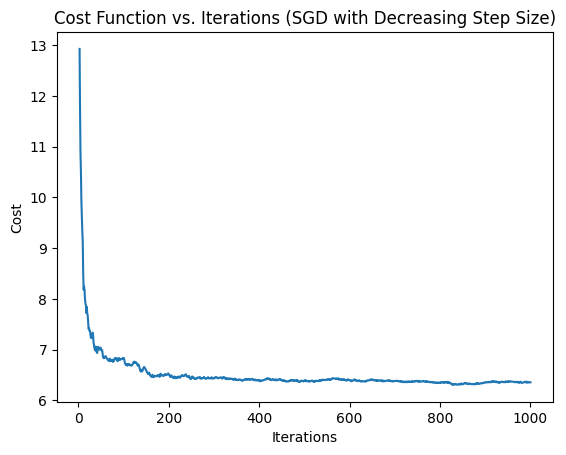

Final weights: [-1.2585035   1.090124   -0.51238983 -5.17329191  0.65739912  1.15983732
 -2.98350411  7.6549166  -0.97174612  0.17262864  3.29366596  0.37542359
 -3.93390853]
Final cost: 6.352807551129936


In [9]:
# Stochastic Gradient Descent with decreasing step size

# Set hyperparameters
delta = 1.0
learning_rate = 0.01
iterations = 1000

# Initialize weights
np.random.seed(42)
w = np.random.randn(X_train.shape[1])

costs = []
for t in range(1, iterations + 1):
    learning_rate = delta / t
    cost = 0
    for j in range(len(y_train)):
        idx = np.random.randint(0, len(y_train))
        x_i = X_train_shuffled[idx, :].reshape(1, -1)
        y_i = y_train_shuffled[idx]
        gradient = np.dot(x_i.T, (sigmoid(np.dot(x_i, w)) - y_i)) + (regularization_param / len(y_train)) * w
        w = w - learning_rate * gradient
        cost += compute_cost(x_i, np.array([y_i]), w, regularization_param)
    costs.append(cost / len(y_train))

# Plotting the cost function
plt.plot(range(1, iterations + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations (SGD with Decreasing Step Size)')
plt.show()

# Report final weights and cost
print(f'Final weights: {w}')
print(f'Final cost: {costs[-1]}')


# Observations :-
1. Batch Gradient Descent -
  - Regularization parameter = 0.1
  - Step size (learning rate) = 0.01
  - Random seed = 42

2. Stochastic Gradient Descent -
  - Step size (learning rate) = 0.01
  - Stochastic Gradient Descent converges faster than Batch Gradient Descent

3. Stochastic Gradient Descent with decreasing step size -
  - Delta = 0.01
  - Stochastic Gradient Descent with decreasing step size converges faster than Normal Stochastic Gradient Descent but with more fluctuations